In [72]:
#Loading dataset
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (2).csv


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
np.random.seed(18)

In [75]:
#Dataset inspection
#DM is Diabetes Mellitus
#DiabetesPedigreeFunction is a function combining diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject.
#Outcome = 0 means no diabetes mellitus, Outcome = 1 means diabetes mellitus
#This dataset consists only of females, therefore the model results are only as accurate as predicted for that sex.
dataset = pd.read_csv("dataset.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:
#For data cleaning, all null and clinically implausible values will be dropped. 
df1 = dataset.dropna()
df1 =df1[df1['Glucose'] >0]
df1 =df1[df1['BloodPressure'] >=40]
df1 =df1[df1['BMI'] > 7]
df1 = df1[df1['SkinThickness'] >0]
df1 = df1[df1['Insulin'] >0]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


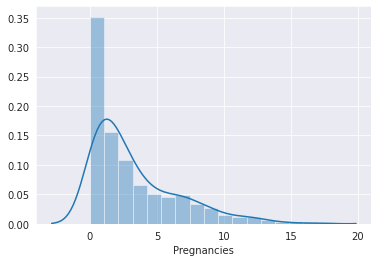

In [77]:
#Variable distributions and some relationships will be visualised to see if further cleaning is necessary.
#Distribution of Pregnancies
sns.distplot(df1['Pregnancies'])

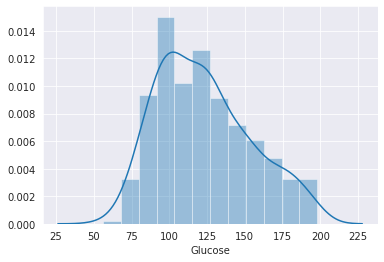

In [78]:
#Distribution of Glucose
sns.distplot(df1['Glucose'])

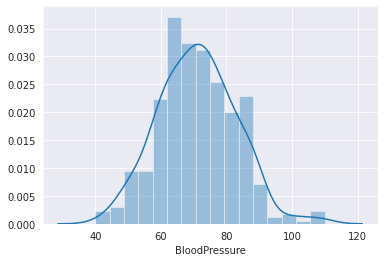

In [79]:
#Distribution of Blood Pressure
sns.distplot(df1['BloodPressure'])

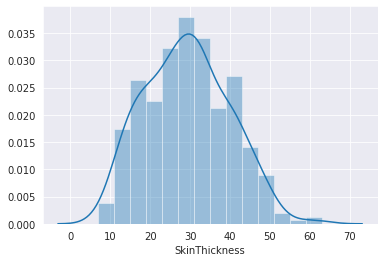

In [80]:
#Distribution of Skin Thickness
sns.distplot(df1['SkinThickness'])

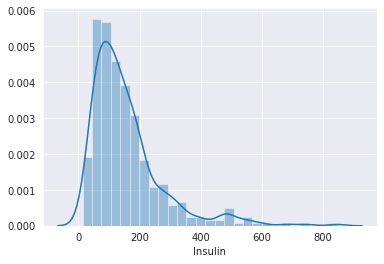

In [81]:
#Distribution of Insulin
sns.distplot(df1['Insulin'])

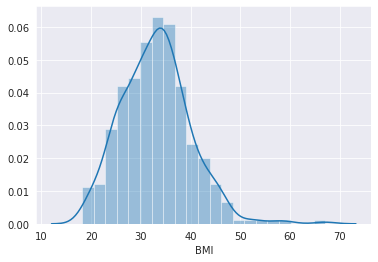

In [82]:
#Distribution of BMI
sns.distplot(df1['BMI'])
#Population distribution slightly skewed to the right compared to general population distribution.
#Some selection bias possibly introduced.

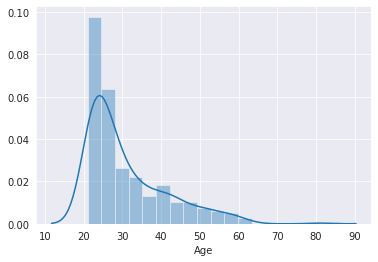

In [83]:
#Distribution of Age
sns.distplot(df1['Age'])
#Age distribution of dataset population does not match age distribution in the general population.
#Some selection bias possibly introduced.

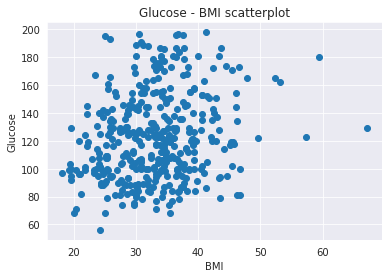

<Figure size 3600x3600 with 0 Axes>

In [84]:
#Glucose - BMI scatterplot
plt.scatter(y = df1["Glucose"], x = df1["BMI"])
plt.ylabel("Glucose")
plt.xlabel("BMI")
plt.title("Glucose - BMI scatterplot")
plt.figure(figsize=(50,50))
plt.show()

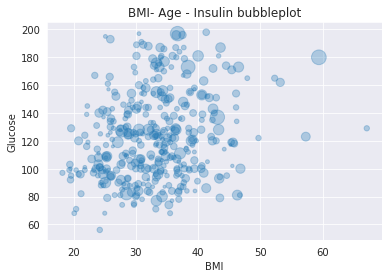

<Figure size 3600x3600 with 0 Axes>

In [85]:
#BMI, Glucose, DiabetesPedigreeFunction scatterplot
plt.scatter(x = df1['BMI'], y=df1['Glucose'], s=(df1['DiabetesPedigreeFunction'])*90, alpha=0.3)
plt.ylabel("Glucose")
plt.xlabel("BMI")
plt.title("BMI- Age - Insulin bubbleplot")
plt.figure(figsize=(50,50))
plt.show()


Text(0.5, 0, 'Glucose')

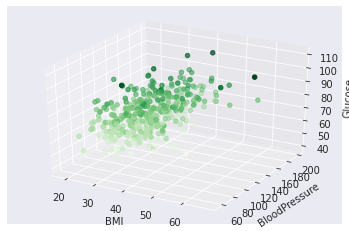

<Figure size 7200x7200 with 0 Axes>

In [86]:
#3D graph: BMI - Blood Pressure - Glucose
ax = plt.axes(projection='3d')


plt.figure(figsize=(100,100))
ax.scatter3D(df1['BMI'], df1['Glucose'], df1['BloodPressure'], c=df1['BloodPressure'], cmap='Greens');
ax.set_xlabel('BMI')
ax.set_ylabel('BloodPressure')
ax.set_zlabel('Glucose')


In [87]:
#Preparing to train Model_1
X_input=df1.drop(columns='Outcome')
Y_output=df1['Outcome']


from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_input, Y_output, test_size =0.30, random_state=18)
import random
random.seed(18)
random_baseline = np.array([random.choice([0,1]) for _ in range(test_y.shape[0])])

In [88]:
#Training Model_1
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=18, n_jobs=4)

classifier.fit(train_X, train_y)

#Diagnostic prediction on test subset using Model_1
pred_y = classifier.predict(test_X)

In [89]:
#Classification report of Model_1 (below), as compared to a random baseling (above)
from sklearn.metrics import classification_report
print(classification_report(test_y, random_baseline))
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        77
           1       0.31      0.47      0.38        40

    accuracy                           0.46       117
   macro avg       0.47      0.46      0.45       117
weighted avg       0.52      0.46      0.48       117

              precision    recall  f1-score   support

           0       0.79      0.91      0.84        77
           1       0.75      0.53      0.62        40

    accuracy                           0.78       117
   macro avg       0.77      0.72      0.73       117
weighted avg       0.77      0.78      0.77       117



In [90]:
#Clinical statistic values calculation for Model_1
from sklearn.metrics import confusion_matrix

def clin_stat_calc(i_matrix):
  TP = i_matrix[0][0]
  FP = i_matrix[1][0]
  TN = i_matrix[1][1]
  FN = i_matrix[0][1]

  Sensitivity = TP / (TP+FN)
  Specificity = TN / (FP+TN)
  PPV = TP/ (TP + FP)
  NPV = TN / (FN + TN)

  print("Sensitivity:", Sensitivity)
  print("Specificity:", Specificity)
  print("PPV:", PPV)
  print("NPV:", NPV)

cm1 = confusion_matrix(test_y, pred_y)


clin_stat_calc(cm1)


Sensitivity: 0.9090909090909091
Specificity: 0.525
PPV: 0.7865168539325843
NPV: 0.75


In [ ]:
#Evaluation of Model_1:
#Of all cases that the model labelled as not DM (value=0) by Model_1, 79% were actually not DM. Of all cases that were truly not DM, the model predicted 91% correctly.
#Of all cases that the model labelled as DM (value=1) by Model_1, 75% were actually DM. Of all cases that were truly DM, the model predicted 53% correctly.
#A sensitivity of 0.91 and a specificity of 0.53 would make it an excellent candidate for a first-line screening test, but a bad candidate for second-line specific diagnostics.

In [91]:
#(An attempt at) hyperparameter optimisation
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=18, n_jobs=-1)
param_grid = {'C': [0.01, 0.1, 1.0]}
search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="f1_macro", cv=5, verbose=True)
search.fit(train_X, train_y)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=18, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.01, 0.1, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=True)

In [92]:
print(search.best_estimator_)
print(search.best_score_)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=18,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
0.7392451473257923


In [93]:
#Analysis of coefficients
classifier.coef_

array([[ 0.1678828 ,  0.03764652, -0.02501889, -0.00783992, -0.00175166,
         0.08526277,  1.15997613,  0.00382454]])

In [94]:
print(classifier.coef_.max())
print(classifier.coef_.argmax())
#DiabetesPedigreeFunction (index=6) has the coefficient furthest from 0, contributing the strongest to the model.
#Insulin (index=4) has the coefficient closest to 0, contributing the least to the model. Similarly, SkinThickness seems to have a very small coefficient, also contributing little.

1.159976126823605
6


In [95]:

#Developing Model_2

#We could possibly develop a model that only requires parameters that are non-invasive and patient-friendly to function.
#This could then be implemented in an e-health application, allowing patients to skip a primary care visit and testing.
#For the development of Model_2, we will drop: glucose(blood testing), insulin(blood testing), skin thickness (biopsy), blood pressure (requires sphygmomanometer).

In [96]:
#Df2 is the slice of the cleaned dataset to be used for development of Model_2
#Sequence of training steps identical to Model_1
df2 = df1.drop(["Glucose", "SkinThickness", "Insulin", "BloodPressure"], axis = 1 )
df2

,Pregnancies,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,28.1,0.167,21,0
4,0,43.1,2.288,33,1
6,3,31.0,0.248,26,1
8,2,30.5,0.158,53,1
13,1,30.1,0.398,59,1
...,...,...,...,...,...
753,0,43.3,0.222,26,1
755,1,36.5,1.057,37,1
760,2,28.4,0.766,22,0
763,10,32.9,0.171,63,0


In [97]:
X2_input=df2.drop(columns='Outcome')
Y2_output=df2['Outcome']

In [98]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2_input, Y2_output, test_size =0.30, random_state=18)
import random
random.seed(18)
random_baseline = np.array([random.choice([0,1]) for _ in range(test_y2.shape[0])])

In [99]:
classifier = LogisticRegression(random_state=18, n_jobs=4)

classifier.fit(train_X2, train_y2)
pred_y2 = classifier.predict(test_X2)

In [100]:
print(classification_report(test_y2, random_baseline))
print(classification_report(test_y2, pred_y2))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        77
           1       0.31      0.47      0.38        40

    accuracy                           0.46       117
   macro avg       0.47      0.46      0.45       117
weighted avg       0.52      0.46      0.48       117

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        77
           1       0.67      0.35      0.46        40

    accuracy                           0.72       117
   macro avg       0.70      0.63      0.63       117
weighted avg       0.71      0.72      0.69       117



In [101]:
#Clinical statistic values calculation for Model 2
cm2 = confusion_matrix(test_y2, pred_y2)
clin_stat_calc(cm2)

Sensitivity: 0.9090909090909091
Specificity: 0.35
PPV: 0.7291666666666666
NPV: 0.6666666666666666


In [ ]:
#Evaluation of Model_2
#Of all cases that the model labelled as not DM (value=0) by Model_1, 73% were actually not DM. Of all cases that were truly not DM, the model predicted 91% correctly.
#Of all cases that the model labelled as DM (value=1) by Model_1, 67% were actually DM. Of all cases that were truly DM, the model predicted 35% correctly.

#Model_2 maintained its capability to exclude non-DM cases with relative success. Its ability to specifically diagnose DM-patients is barely superior to a random baseline.
#While the model maintained its very high sensitivity, the specificity of 0.35 is likely an indicator of overfitting.
#This is also expected due to how much data was excluded. This is likely a fixable problem, given more advanced data-cleaning methods or a larger dataset to train from.